In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\punpo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\punpo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Load the data 
review_df = pd.read_csv('amazon_alexa.tsv', sep ='\t')
review_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
review_df["length"] = review_df['verified_reviews'].apply(len)


In [5]:
review_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<AxesSubplot: xlabel='rating', ylabel='count'>

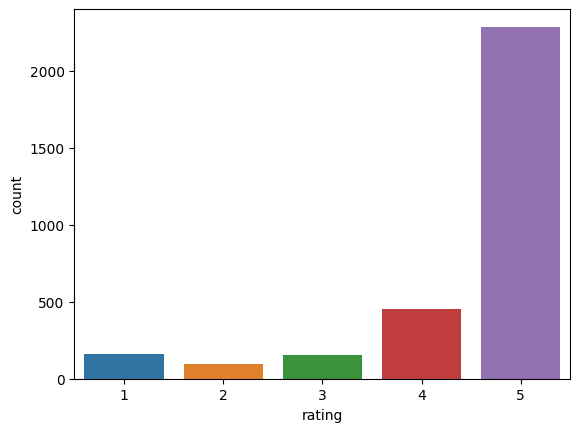

In [6]:
sns.countplot(x = review_df["rating"])

,rating,date,variation,verified_reviews,feedback,length,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,"[Love, my, Echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,"[Loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,"[Sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,"[I, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,[Music]
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,"[Perfect, for, kids, adults, and, everyone, in..."
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,"[Listening, to, music, searching, locations, c..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,"[I, do, love, these, things, i, have, them, ru..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,"[Only, complaint, I, have, is, that, the, soun..."


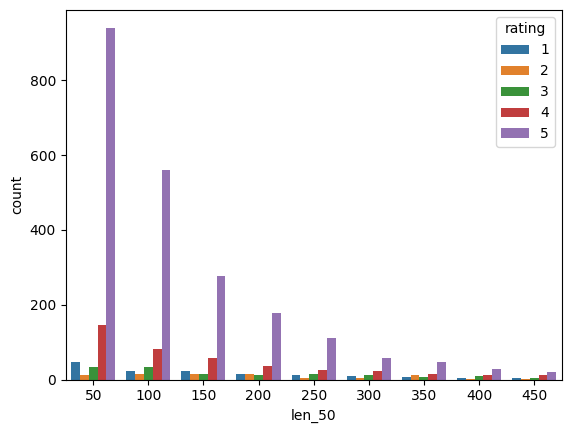

In [31]:
review_df["len_50"] = (review_df['verified_reviews'].apply(len)//50)*50 + 50
sns.countplot(x = review_df["len_50"].loc[review_df['len_50'] < 10*50], hue  = review_df["rating"].loc[review_df['len_50'] < 10*50])
review_df.drop(["len_50"], axis=1)

In [8]:
review_df[review_df['length'] == 2851]["verified_reviews"].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [9]:
def delete_puncNstop(massage):
    import string
    stopwords = nltk.corpus.stopwords.words('english')
    massage_char = [char for char in massage if char not in string.punctuation]
    massage = "".join(massage_char)
    return([word for word in massage.split() if word.lower not in stopwords])

In [21]:
review_df['cleaned_reviews'] = review_df['verified_reviews'].apply(delete_puncNstop)

In [ ]:
from wordcloud import WordCloud
def join_massage(Listmassage):
    return(" ".join(Listmassage))

FiveStar_review_as_one = review_df['cleaned_reviews'].loc[review_df['rating'] == 5].apply(join_massage)
FiveStar_review_as_one = " ".join(FiveStar_review_as_one)
plt.imshow(WordCloud().generate(FiveStar_review_as_one))

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = delete_puncNstop, dtype = np.uint8)
countvectorizer = vectorizer.fit_transform(review_df['cleaned_reviews'])
#print(vectorizer.get_feature_names())


In [55]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
countvectorizer.shape

(3150, 2258)

In [68]:
df_final = {'data': pd.DataFrame(countvectorizer.toarray()), 'rating': review_df['rating'] }
df_final

{'data':       0     1     2     3     4     5     6     7     8     9     ...  2248  \
 0        0     0     0     0     0     0     0     0     0     0  ...     0   
 1        0     0     0     0     0     0     0     0     0     0  ...     0   
 2        0     0     0     0     0     0     0     0     0     0  ...     0   
 3        0     0     0     0     0     0     0     0     0     0  ...     0   
 4        0     0     0     0     0     0     0     0     0     0  ...     0   
 ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
 3145     0     0     0     0     0     0     0     0     0     0  ...     0   
 3146     0     0     0     0     0     0     0     0     0     0  ...     0   
 3147     0     0     0     0     0     0     0     0     0     0  ...     0   
 3148     0     0     0     0     0     0     0     0     0     0  ...     0   
 3149     0     0     0     0     0     0     0     0     0     0  ...     0   
 
       2249  2250  2251  2252 

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_final["data"], df_final["rating"], test_size=0.2)


MultinomialNB()

<AxesSubplot: >

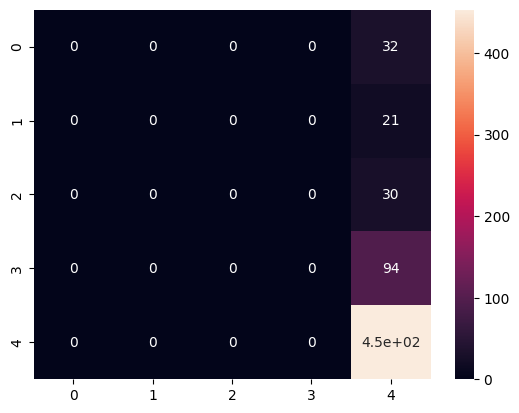

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

NB_classifier.fit(x_train, y_train)

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
'''
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)'''

In [93]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        94
           5       0.72      1.00      0.84       453

    accuracy                           0.72       630
   macro avg       0.14      0.20      0.17       630
weighted avg       0.52      0.72      0.60       630



c:\Users\punpo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\punpo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\punpo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,